# Anexo Proyecto Final Grupo 6 - Data Analytics 2024 - ICARO

In [11]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from statsmodels.tsa.stattools import adfuller

# Prueba de Raíz Unitaria (Dickey-Fuller) para series estacionarias
""" 
Hipótesis Nula (H0): La serie de tiempo NO es estacionaria
Hipótesis Alternativa (H1): La serie de tiempo ES estacionaria

Criterios de decisión - Prueba Unilateral Izquierda:
p-value >= 0.05: No se rechaza H0   # Τ obs >= Τ crit
p-value < 0.05: Se rechaza H0   	# Τ obs < Τ crit
"""

df = pd.read_excel("Data Model - Pizza Sales.xlsx")

# Convertir columnas a datetime
sales = df.groupby(['order_date'])['quantity'].sum().reset_index()
sales['order_date'] = pd.to_datetime(sales['order_date'])

stat, p, lags, obs, crit, t = adfuller(sales['quantity'])
print('Estadístico Τ observado = %.3f, P-value = %.3f' % (stat, p))
if p > 0.05:
	print('Se acepta la Hipótesis Nula. La serie de tiempo NO es estacionaria con un nivel de significación del 5%')
else:
	print('Se rechaza la Hipótesis Nula. La serie de tiempo ES estacionaria con un nivel de significación del 5%')

Estadístico Τ observado = -5.220, P-value = 0.000
Se rechaza la Hipótesis Nula. La serie de tiempo ES estacionaria con un nivel de significación del 5%


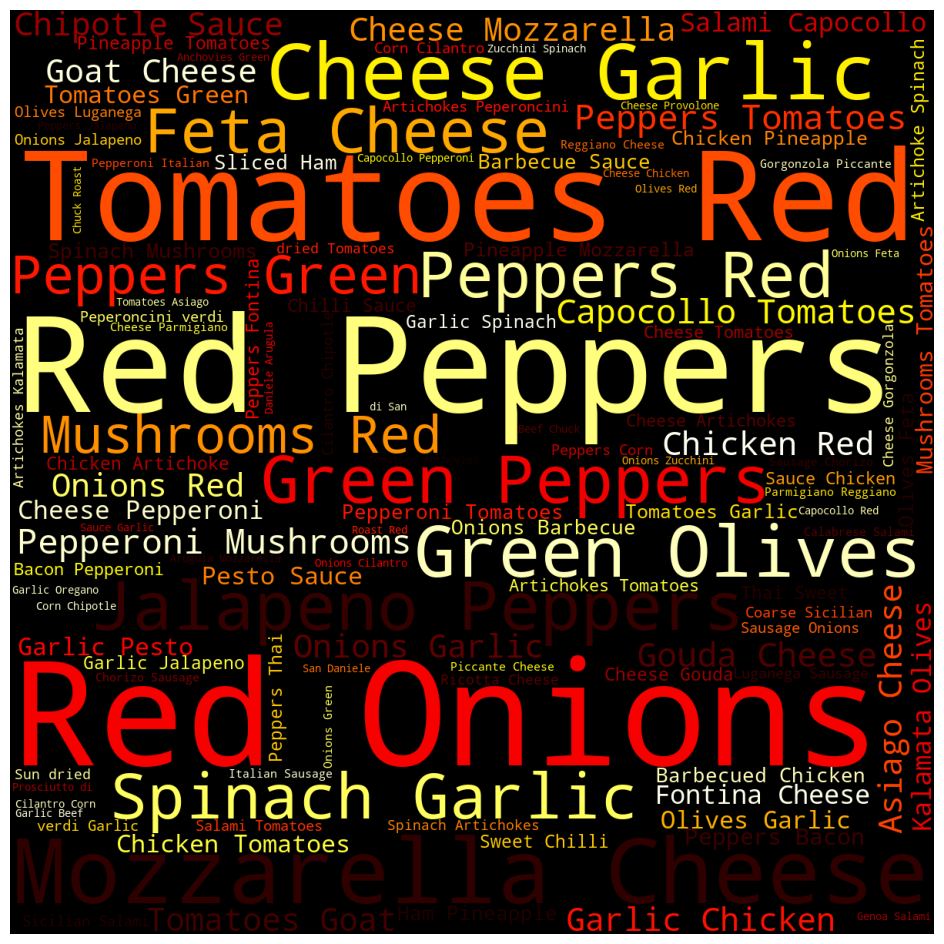

In [14]:
# Wordcloud del tablero de PBI
text = ' '.join(df['pizza_ingredients'])

plt.figure(figsize=(12, 12))
wordcloud = WordCloud(background_color = 'black', colormap='hot', width = 1200, height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()